<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 Combined: West Nile Virus Prediction

by Gary, Hao Ming and Jun Hong

---
## Part 3: Modelling

### Contents:
- [Preprocessing](#Preprocessing)
- [Modelling](#Modelling)
- [Model Evaluation](#Model-Evaluation)
- [Final Model Predictions](#Final-Model-Predictions)


## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, auc, roc_curve, confusion_matrix, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Train and Test Data for Modelling

df_train = pd.read_csv("../assets/train_tomodel.csv")
df_test = pd.read_csv("../assets/test_tomodel.csv")

In [3]:
df_train.head()

,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,WetBulb,ResultSpeed,AvgSpeed,relative_humidity,Trange,...,relative_humidity_14,Trange_14,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Month_6,Month_7,Month_8,Month_10,Species_OTHERS
0,41.731922,-87.677512,1,0,88.0,65.5,5.8,6.95,64,28,...,41.357143,24.785714,1,0,0,0,0,0,0,0
1,41.954690,-87.800991,1,0,88.0,65.5,5.8,6.95,64,28,...,41.357143,24.785714,0,1,0,0,0,0,0,0
2,41.974089,-87.824812,1,0,88.0,65.5,5.8,6.95,64,28,...,41.357143,24.785714,0,1,0,0,0,0,0,0
3,41.867108,-87.654224,1,0,88.0,65.5,5.8,6.95,64,28,...,41.357143,24.785714,0,1,0,0,0,0,0,0
4,41.919343,-87.694259,1,0,88.0,65.5,5.8,6.95,64,28,...,41.357143,24.785714,0,1,0,0,0,0,0,0


In [4]:
df_test.head()

,Id,Latitude,Longitude,Tmax,WetBulb,ResultSpeed,AvgSpeed,relative_humidity,Trange,Tmax_7,...,relative_humidity_14,Trange_14,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Month_6,Month_7,Month_8,Month_10,Species_OTHERS
0,1,41.95469,-87.800991,86.0,64.0,9.15,10.2,59,25,83.428571,...,70.0,20.571429,0,1,0,1,0,0,0,0
1,2,41.95469,-87.800991,86.0,64.0,9.15,10.2,59,25,83.428571,...,70.0,20.571429,0,0,1,1,0,0,0,0
2,3,41.95469,-87.800991,86.0,64.0,9.15,10.2,59,25,83.428571,...,70.0,20.571429,1,0,0,1,0,0,0,0
3,4,41.95469,-87.800991,86.0,64.0,9.15,10.2,59,25,83.428571,...,70.0,20.571429,0,0,0,1,0,0,0,1
4,5,41.95469,-87.800991,86.0,64.0,9.15,10.2,59,25,83.428571,...,70.0,20.571429,0,0,0,1,0,0,0,1


In [5]:
# Defining X and y for modelling

X = df_train.drop(columns = ['WnvPresent','NumMosquitos'], axis =1)
y = df_train['WnvPresent']
test = df_test.drop('Id', axis =1)

In [6]:
# checking if y is imbalanced

print(y.value_counts(normalize=True))

0    0.946077
1    0.053923
Name: WnvPresent, dtype: float64


In [7]:
# Conducting a train and validation split

X_train,X_val,y_train,y_val = train_test_split(X,
                                               y,
                                               random_state=42, 
                                               stratify=y,
                                               test_size=0.2)

## Modelling

In [8]:
# constructing 4 pipeline
# each pipeline will include
# Scaling
# SMOTE (to tackle the imbalance y)
# classifier model

# pipe line 1, smote with Randomforestclassifier
# SMOTE synthesises new minority instances between existing minority instances
# SMOTE applies KNN approach where it selects K nearest neighbors, joins them and creates the synthetic samples in the space.
# RandomForestClassifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

pipe_1 = Pipeline([('scaling', StandardScaler()),
                   ('sampling', SMOTE()), 
                   ('RF', RandomForestClassifier())])

pipe_params_1 = {'sampling__k_neighbors': [10],
                 'sampling__random_state': [42], #[10, 15, 20]
                 'RF__n_estimators': [20], #[10, 20, 30, 40]
                 'RF__max_leaf_nodes': [5], #[3, 4, 5]
                 'RF__max_depth': [3], # [3, 4, 5, 6, 7]
                 'RF__random_state': [42]}

# pipe line 2, smote with XGBClassifier
#XGBClassifier is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library

pipe_2 = Pipeline([('scaling', StandardScaler()),
                   ('sampling', SMOTE()), 
                   ('xgb', XGBClassifier())])

pipe_params_2 = {'sampling__k_neighbors': [10], #[5, 10]
                 'sampling__random_state': [42],
                 'xgb__learning_rate': [0.15], # [0.03, 0.05, 0.1, 0.1, 0.15, 0.2]
                 'xgb__max_depth':[4], #[2, 3, 4]
                 'xgb__n_estimators': [45], #[20, 30, 40, 45, 50]
                 'xgb__subsample':[0.5], #[0.1, 0.2, 0.3, 0.5, 0.8, 1]
                 'xgb__verbosity': [0]} #[0,2]

# pipe line 3, smote with AdaBoostClassifier
# AdaBoostClassifier begins by fitting a classifier on the original dataset and then fits 
# additional copies of the classifier on the same dataset but where the weights of incorrectly 
# classified instances are adjusted such that subsequent classifiers focus more on difficult cases

pipe_3 = Pipeline([('scaling', StandardScaler()),
                   ('sampling', SMOTE()),
                   ('ada', AdaBoostClassifier())])

pipe_params_3 = {'sampling__k_neighbors': [5], #[5,10,15]
                 'sampling__random_state': [42],
                 'ada__n_estimators': [50], #[20, 30, 40, 50, 60]
                 'ada__learning_rate': [0.5]} #[0.5, 0.8, 0.9, 1]

#logistic regression
pipe_4 = Pipeline([('scaling', StandardScaler()),
                   ('sampling', SMOTE()),
                   ('logr', LogisticRegression())])

pipe_params_4 = {'sampling__k_neighbors': [5], #[5,10,15]
                 'sampling__random_state': [42],
                 'logr__penalty': ['l2'], #['l1', 'l2']
                 'logr__C':[0.12648552168552957], # np.linespace
                 'logr__class_weight': [None], #[None, 'balanced']
                 'logr__max_iter': [500]} 


def run_model(pipe, pipe_params):
    
    global X_train,X_val,y_train,y_val
    
    #include gridsearch
    gs = GridSearchCV(pipe,param_grid = pipe_params,scoring = 'roc_auc', cv=5, verbose = 1, n_jobs = -1)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    preds = gs.predict(X_val)
    print("ROC_AUC CV score: ", gs.best_score_)
    print("Train Score: ", gs.score(X_train,y_train))
    print("Test Score: ", gs.score(X_val,y_val))
    plot_confusion_matrix(gs,X_val,y_val)
    plot_roc_curve(gs,X_val,y_val)

### Random Forest

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'RF__max_depth': 3, 'RF__max_leaf_nodes': 5, 'RF__n_estimators': 20, 'RF__random_state': 42, 'sampling__k_neighbors': 10, 'sampling__random_state': 42}
ROC_AUC CV score:  0.8033186716647869
Train Score:  0.818654037189822
Test Score:  0.7986147269189663


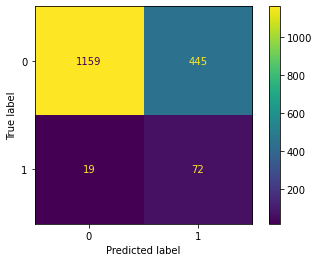

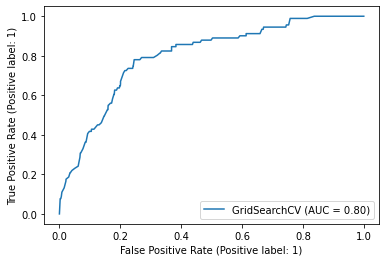

In [9]:
#Random Forest
run_model(pipe_1, pipe_params_1)

### XGBoost

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'sampling__k_neighbors': 10, 'sampling__random_state': 42, 'xgb__learning_rate': 0.15, 'xgb__max_depth': 4, 'xgb__n_estimators': 45, 'xgb__subsample': 0.5, 'xgb__verbosity': 0}
ROC_AUC CV score:  0.839663326752838
Train Score:  0.8952434565099228
Test Score:  0.8416561617933189


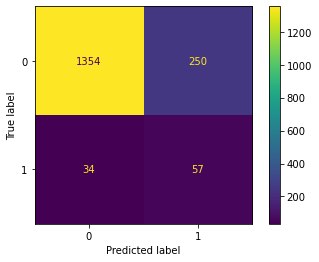

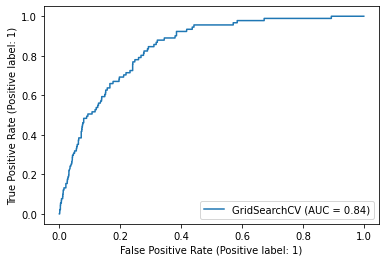

In [10]:
#XGBoost
run_model(pipe_2, pipe_params_2)

### AdaBoost

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'ada__learning_rate': 0.5, 'ada__n_estimators': 50, 'sampling__k_neighbors': 5, 'sampling__random_state': 42}
ROC_AUC CV score:  0.8314381347095265
Train Score:  0.856277933686727
Test Score:  0.8177530075909129


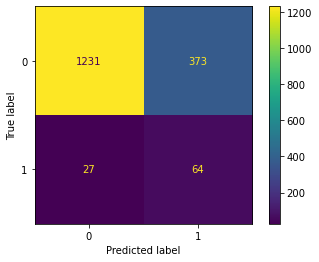

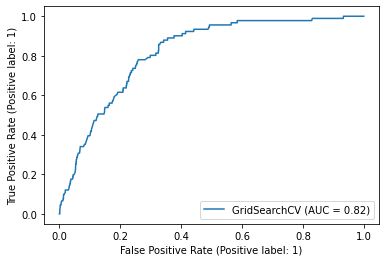

In [11]:
#AdaBoost
run_model(pipe_3, pipe_params_3)

### Logistic Regression

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'logr__C': 0.12648552168552957, 'logr__class_weight': None, 'logr__max_iter': 500, 'logr__penalty': 'l2', 'sampling__k_neighbors': 5, 'sampling__random_state': 42}
ROC_AUC CV score:  0.8358125283217103
Train Score:  0.8511981134165189
Test Score:  0.8297114356964732


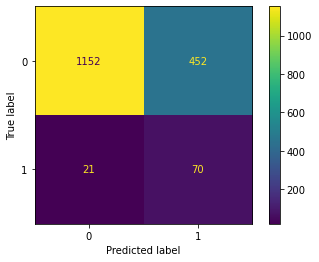

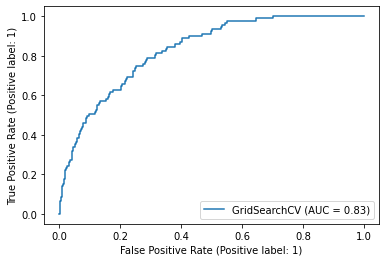

In [12]:
#Logistic Regression
run_model(pipe_4, pipe_params_4)

### Baseline Model

Our baseline score is based on the probability of WNV occurence after applying SMOTE on train dataset, i.e. 0.50.

In [13]:
smt = SMOTE()

In [14]:
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [15]:
y_train_smt.value_counts(normalize=True)

0    0.5
1    0.5
Name: WnvPresent, dtype: float64

## Model Evaluation

The various metrics are compiled in the table below for easy comparison among the models.

|   |      **Classifier** | **Train** | **Test** | **ROC_AUC CV** | **Train-Test** |
|--:|--------------------:|--------------|----------------|-----------------|------------|
| 1 | Random Forest       | 0.818        | 0.799          | 0.803           | **0.019**  |
| 2 | AdaBoost            | 0.856        | 0.818          | 0.831           | 0.038      |
| 3 | XGBoost             | 0.895        | 0.841          | **0.840**       | 0.054      |
| 4 | Logistic Regression | 0.851        | 0.829          | **0.836**       | **0.022**  |

From the above table, we observe that the Random Forest model suffers the least overfitting, with train score just 0.019 above the test score. This is closely followed by the Logistic Regression model of 0.022 difference between the train and test scores.

However, the Random Forest model scored lowest for ROC_AUC metric while the Logistic Regression acheive the second highest score of 0.836, losing out marginally to the XGboost model which is also the most overfitted model.

Therefore, having considered both the ROC AUC score and how well the model fits, our group has choosen the Logistic Model in this case as our model of choice.

<Figure size 432x288 with 0 Axes>

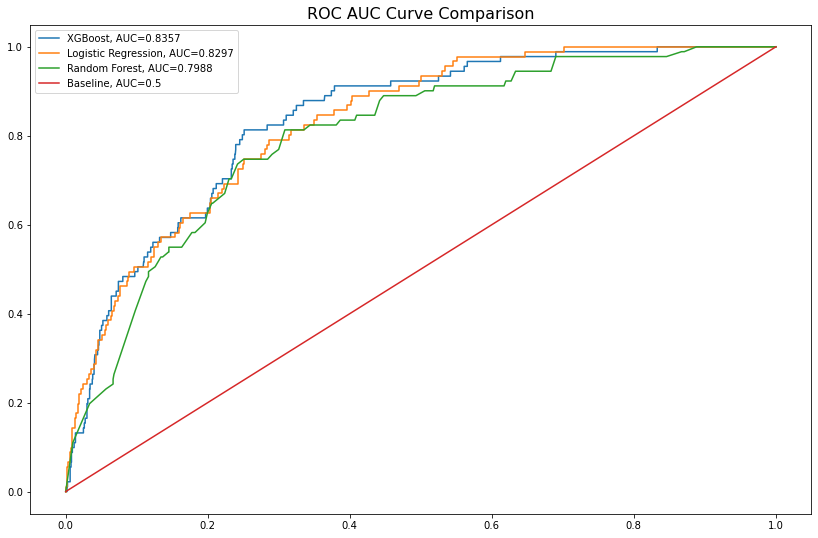

In [16]:
#set up plotting area
plt.figure(0).clf()
plt.figure(figsize=(14,9))

#fit XGBoost model and plot ROC Curve
learning_ratebestparam3 = 0.15
max_depthbestparam3 = 4
n_estimatorsbestparam3 = 45
subsample_bestparam3 = 0.1
verbosity_bestparam3 = 0

best_gs_xg = Pipeline([('ss',StandardScaler()),
                       ('sampling', SMOTE(k_neighbors = 10,
                                         random_state = 42)),
                        ('xgb', XGBClassifier(learning_rate  = learning_ratebestparam3, 
                                              max_depth = max_depthbestparam3, 
                                              n_estimators = n_estimatorsbestparam3, 
                                              subsample = subsample_bestparam3,
                                              verbosity = verbosity_bestparam3))])


best_gs_xg.fit(X_train, y_train)
preds_xg = best_gs_xg.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, preds_xg)
auc = round(metrics.roc_auc_score(y_val, preds_xg), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

#fit logistic regression model and plot ROC curve
penaltybestparam4 = 'l2'
class_weightbestparam4 = None
Cbestparam4 = 0.12648552168552957

best_gs_lr = Pipeline([('ss',StandardScaler()),
                       ('sampling', SMOTE(k_neighbors = 5,
                                         random_state = 42)),
                       ('logr', LogisticRegression(penalty  = penaltybestparam4,
                                                   max_iter = 5000,
                                                   class_weight = class_weightbestparam4,
                                                   C = Cbestparam4))])

best_gs_lr.fit(X_train, y_train)
preds_lr = best_gs_lr.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, preds_lr)
auc = round(metrics.roc_auc_score(y_val, preds_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit random forest model and plot ROC curve
n_estimatorsbestparam = 20
max_leaf_nodesbestparam = 5
max_depthbestparam = 3

best_gs_rf = Pipeline([('ss',StandardScaler()),
                       ('sampling', SMOTE(k_neighbors = 10,
                                         random_state = 42)),
                       ('RF', RandomForestClassifier(n_estimators = n_estimatorsbestparam, 
                                                     max_leaf_nodes = max_leaf_nodesbestparam,
                                                     max_depth = max_depthbestparam))])

best_gs_rf.fit(X_train, y_train)
preds_rf = best_gs_rf.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, preds_rf)
auc = round(metrics.roc_auc_score(y_val, preds_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

preds_baseline = [0.054]*len(y_val)
fpr, tpr, _ = metrics.roc_curve(y_val, preds_baseline)
auc = round(metrics.roc_auc_score(y_val, preds_baseline), 4)
plt.plot(fpr,tpr,label="Baseline, AUC="+str(auc))


#add legend
plt.legend()

plt.title('ROC AUC Curve Comparison', fontsize = 16);

## Final Model Predictions

### Logistic Regression

In [17]:
penaltybestparam4 = 'l2'
class_weightbestparam4 = None
Cbestparam4 = 0.12648552168552957

best_gs_lr = Pipeline([('ss',StandardScaler()),
                       ('logr', LogisticRegression(penalty  = penaltybestparam4,
                                                   max_iter = 5000,
                                                   class_weight = class_weightbestparam4,
                                                   C = Cbestparam4))])

best_gs_lr.fit(X, y)
predictions_lr = best_gs_lr.predict_proba(test)[:,1]


In [18]:
# exporting csv file for Kaggle Submission
df_test['WnvPresent'] = predictions_lr
testing_submission = df_test[['Id', 'WnvPresent']]
testing_submission.columns = ['Id', 'WnvPresent']
testing_submission.to_csv('../assets/KaggleSub_LR.csv', index=False)

In [19]:
# Fitting model to retrieve useful features

In [20]:
gs_lr = GridSearchCV(pipe_4,param_grid = pipe_params_4,scoring = 'roc_auc', cv=5, verbose = 1, n_jobs = -1)
gs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('sampling', SMOTE()),
                                       ('logr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logr__C': [0.12648552168552957],
                         'logr__class_weight': [None], 'logr__max_iter': [500],
                         'logr__penalty': ['l2'], 'sampling__k_neighbors': [5],
                         'sampling__random_state': [42]},
             scoring='roc_auc', verbose=1)

In [21]:
n_coef = gs_lr.best_estimator_[0].get_feature_names_out()
coef = gs_lr.best_estimator_.named_steps.logr.coef_[0]
coef = np.exp(coef)
df_coef = pd.DataFrame(coef,index=n_coef)
df_coef.columns = ["coef_lr"]
df_coef.sort_values(by = ['coef_lr'],ascending = False).head(10)

,coef_lr
WetBulb,3.613631
AvgSpeed_14,3.560329
relative_humidity_14,3.184782
relative_humidity_7,2.263826
SeaLevel_14,1.988329
Trange_7,1.881251
AvgSpeed,1.491850
Tmax_7,1.466325
WetBulb_14,1.451649
Tmax_14,1.448248


From the above table, we observe that the important features utilised by the model to make the prediction are mainly associated with weather conditions for the past 1 and 2 weeks. This is consistent with the breeding cycle of mosquitos thus if the favourable conditions are detected, it will increase the chance of mosquitos breeding and presence of the West Nile Virus.